In [345]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [346]:
import pyforest  ###Use major Python libraries without importing
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from collections import OrderedDict
from sklearn.model_selection import GridSearchCV

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [347]:
train = pd.read_csv("/Users/vsinha/Desktop/ML/tab_comp/train.csv", sep=",")
train.head()

<IPython.core.display.Javascript object>

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,A,B,A,A,B,D,A,E,C,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,2,B,A,A,A,B,B,A,E,A,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,3,A,A,A,C,B,D,A,B,C,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,4,A,A,A,C,B,D,A,E,G,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,6,A,B,A,A,B,B,A,E,C,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


<IPython.core.display.Javascript object>

In [66]:
test = pd.read_csv("/Users/vsinha/Desktop/ML/tab_comp/test.csv", sep=",")
test.head()

<IPython.core.display.Javascript object>

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,A,B,A,C,B,D,A,E,E,...,0.701679,0.595507,0.286912,0.279884,0.202234,0.242654,0.285147,0.264308,0.653654,0.302448
1,5,A,B,A,C,B,D,A,E,C,...,0.277480,0.479552,0.397436,0.476742,0.857073,0.516393,0.562065,0.730542,0.318492,0.736251
2,15,A,B,A,C,B,D,A,E,C,...,0.279508,0.676395,0.695284,0.253316,0.586934,0.548555,0.836193,0.759788,0.333572,0.273905
3,16,A,A,B,A,B,D,A,E,E,...,0.479503,0.759875,0.240049,0.298074,0.442475,0.596746,0.414131,0.255382,0.589080,0.311625
4,17,A,B,A,A,B,B,A,E,E,...,0.757845,0.210232,0.329851,0.616663,0.170475,0.263235,0.710961,0.224045,0.285860,0.794931


<IPython.core.display.Javascript object>

In [67]:
train.isnull().sum()

id        0
cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
target    0
dtype: int64

<IPython.core.display.Javascript object>

In [69]:
train_data = train.drop(["id"], axis=1)
y_train_data = train.target
test_data = test.drop(["id"], axis=1)

<IPython.core.display.Javascript object>

In [70]:
train_data.head()
y_train_data.head()
test_data.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,A,B,A,A,B,D,A,E,C,I,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,B,A,A,A,B,B,A,E,A,F,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,A,A,A,C,B,D,A,B,C,N,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,A,A,A,C,B,D,A,E,G,K,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,A,B,A,A,B,B,A,E,C,F,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


0    6.994023
1    8.071256
2    5.760456
3    7.806457
4    6.868974
Name: target, dtype: float64

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,A,B,A,C,B,D,A,E,E,G,...,0.701679,0.595507,0.286912,0.279884,0.202234,0.242654,0.285147,0.264308,0.653654,0.302448
1,A,B,A,C,B,D,A,E,C,L,...,0.277480,0.479552,0.397436,0.476742,0.857073,0.516393,0.562065,0.730542,0.318492,0.736251
2,A,B,A,C,B,D,A,E,C,F,...,0.279508,0.676395,0.695284,0.253316,0.586934,0.548555,0.836193,0.759788,0.333572,0.273905
3,A,A,B,A,B,D,A,E,E,F,...,0.479503,0.759875,0.240049,0.298074,0.442475,0.596746,0.414131,0.255382,0.589080,0.311625
4,A,B,A,A,B,B,A,E,E,I,...,0.757845,0.210232,0.329851,0.616663,0.170475,0.263235,0.710961,0.224045,0.285860,0.794931


<IPython.core.display.Javascript object>

In [71]:
train_data.shape
test_data.shape

(300000, 25)

(200000, 24)

<IPython.core.display.Javascript object>

In [72]:
train_data.columns

Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6',
       'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13',
       'target'],
      dtype='object')

<IPython.core.display.Javascript object>

In [73]:
cat_cols = [feature for feature in train.columns if "cat" in feature]
cont_cols = [feature for feature in train.columns if "con" in feature]

<IPython.core.display.Javascript object>

In [74]:
for enc in cat_cols:
    le = LabelEncoder()
    train_data[enc] = le.fit_transform(train_data[enc])
    test_data[enc] = le.transform(test_data[enc])

<IPython.core.display.Javascript object>

In [75]:
train_data.head()
test_data.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,0,1,0,0,1,3,0,4,2,8,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,1,0,0,0,1,1,0,4,0,5,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,0,0,0,2,1,3,0,1,2,13,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,0,0,0,2,1,3,0,4,6,10,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,0,1,0,0,1,1,0,4,2,5,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,1,0,2,1,3,0,4,4,6,...,0.701679,0.595507,0.286912,0.279884,0.202234,0.242654,0.285147,0.264308,0.653654,0.302448
1,0,1,0,2,1,3,0,4,2,11,...,0.277480,0.479552,0.397436,0.476742,0.857073,0.516393,0.562065,0.730542,0.318492,0.736251
2,0,1,0,2,1,3,0,4,2,5,...,0.279508,0.676395,0.695284,0.253316,0.586934,0.548555,0.836193,0.759788,0.333572,0.273905
3,0,0,1,0,1,3,0,4,4,5,...,0.479503,0.759875,0.240049,0.298074,0.442475,0.596746,0.414131,0.255382,0.589080,0.311625
4,0,1,0,0,1,1,0,4,4,8,...,0.757845,0.210232,0.329851,0.616663,0.170475,0.263235,0.710961,0.224045,0.285860,0.794931


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

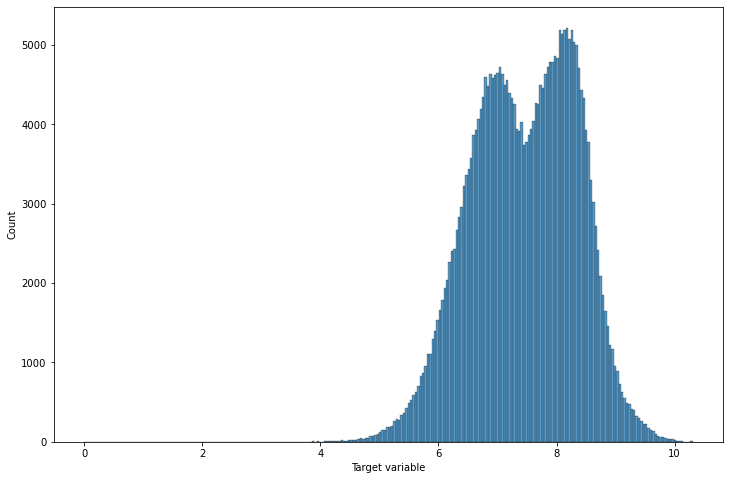

<IPython.core.display.Javascript object>

In [76]:
plt.figure(figsize=(12, 8))
sns.histplot(train_data["target"])
plt.xlabel("Target variable")
plt.ylabel("Count")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

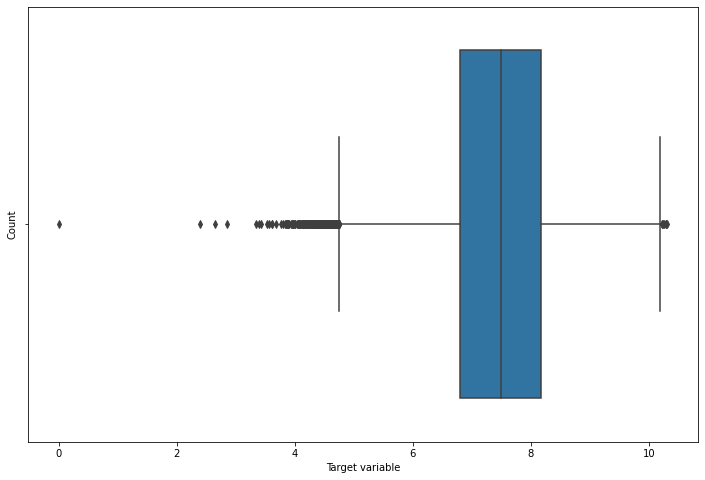

<IPython.core.display.Javascript object>

In [77]:
plt.figure(figsize=(12, 8))
sns.boxplot(train_data["target"])
plt.xlabel("Target variable")
plt.ylabel("Count")
plt.show()

In [78]:
Q1 = train_data["target"].quantile(0.25)
Q3 = train_data["target"].quantile(0.75)
IQR = Q3 - Q1
print("Q1 is " + str(Q1))
print("Q3 is " + str(Q3))
print("IQR is " + str(IQR))

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("lower_bound is " + str(lower_bound))
print("upper_bound is " + str(upper_bound))

Q1 is 6.798340503667209
Q3 is 8.161166382443852
IQR is 1.3628258787766434
lower_bound is 4.754101685502244
upper_bound is 10.205405200608817


<IPython.core.display.Javascript object>

In [113]:
outliers_in_data = train_data[
    (train_data["target"] < (lower_bound)) | (train_data["target"] > (upper_bound))
]


print(
    "Total outliers in the target variable in training dataset is "
    + str(len(outliers_in_data))
)

Total outliers in the target variable in training dataset is 359


<IPython.core.display.Javascript object>

In [114]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1  # Interquartile range
    print("Q1: " + str(q1), "Q3: " + str(q3), "IQR: " + str(iqr))
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    outlier_count = df_in.loc[
        (df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)
    ]
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    print(
        "Total outliers in the target variable in training dataset is "
        + str(len(outlier_count))
    )
    print("Shape of data after cleaning is " + str(df_out.shape))
    return df_out

<IPython.core.display.Javascript object>

In [115]:
# remove_outlier(X_train, "target")

train_data_cleaned = remove_outlier(train_data, "target")

Q1: 6.798340503667209 Q3: 8.161166382443852 IQR: 1.3628258787766434
Total outliers in the target variable in training dataset is 359
Shape of data after cleaning is (299641, 25)


<IPython.core.display.Javascript object>

In [116]:
train_data_cleaned

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,0,1,0,0,1,3,0,4,2,8,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,1,0,0,0,1,1,0,4,0,5,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,0,0,0,2,1,3,0,1,2,13,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,0,0,0,2,1,3,0,4,6,10,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,0,1,0,0,1,1,0,4,2,5,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,1,0,2,1,1,0,4,4,11,...,0.269578,0.258655,0.363598,0.300619,0.340516,0.235711,0.383477,0.215227,0.793630,8.343538
299996,0,1,0,2,1,1,0,4,4,11,...,0.197211,0.257024,0.574304,0.227035,0.322583,0.286094,0.324874,0.306933,0.230902,7.851861
299997,0,1,0,2,1,1,0,4,2,12,...,0.449482,0.386172,0.476217,0.135947,0.502730,0.235788,0.316671,0.250286,0.349041,7.600558
299998,0,1,1,2,1,1,0,3,4,5,...,0.363130,0.324132,0.229017,0.220888,0.515304,0.389391,0.245234,0.303895,0.481138,8.272095


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

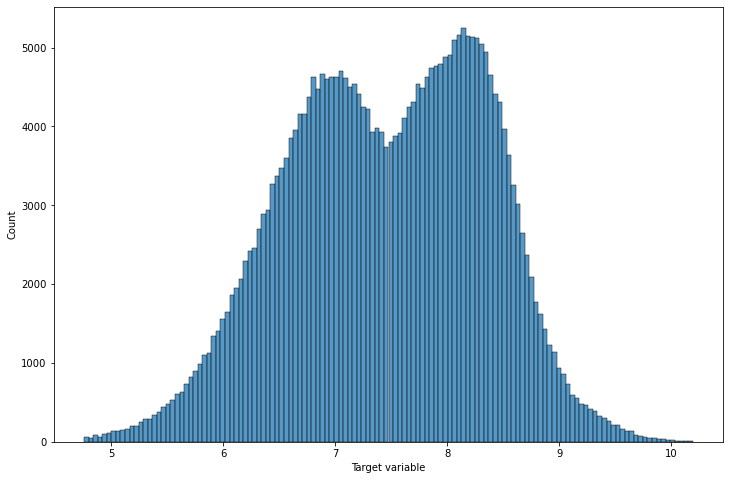

<IPython.core.display.Javascript object>

In [118]:
plt.figure(figsize=(12, 8))
sns.histplot(train_data_cleaned["target"])
plt.xlabel("Target variable")
plt.ylabel("Count")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

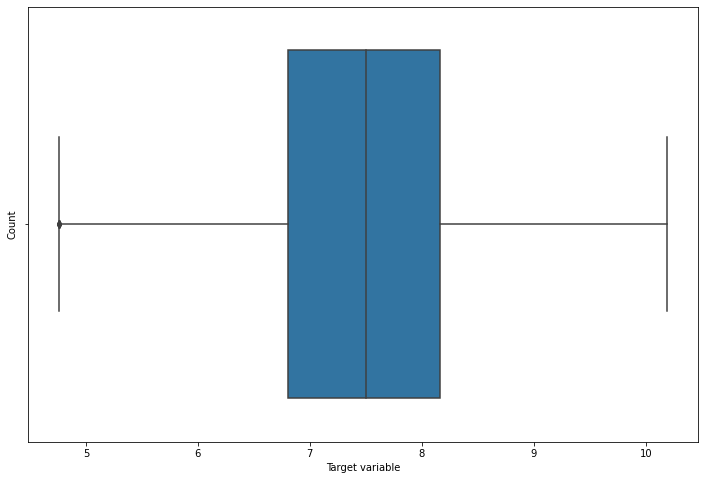

<IPython.core.display.Javascript object>

In [119]:
plt.figure(figsize=(12, 8))
sns.boxplot(train_data_cleaned["target"])
plt.xlabel("Target variable")
plt.ylabel("Count")
plt.show()

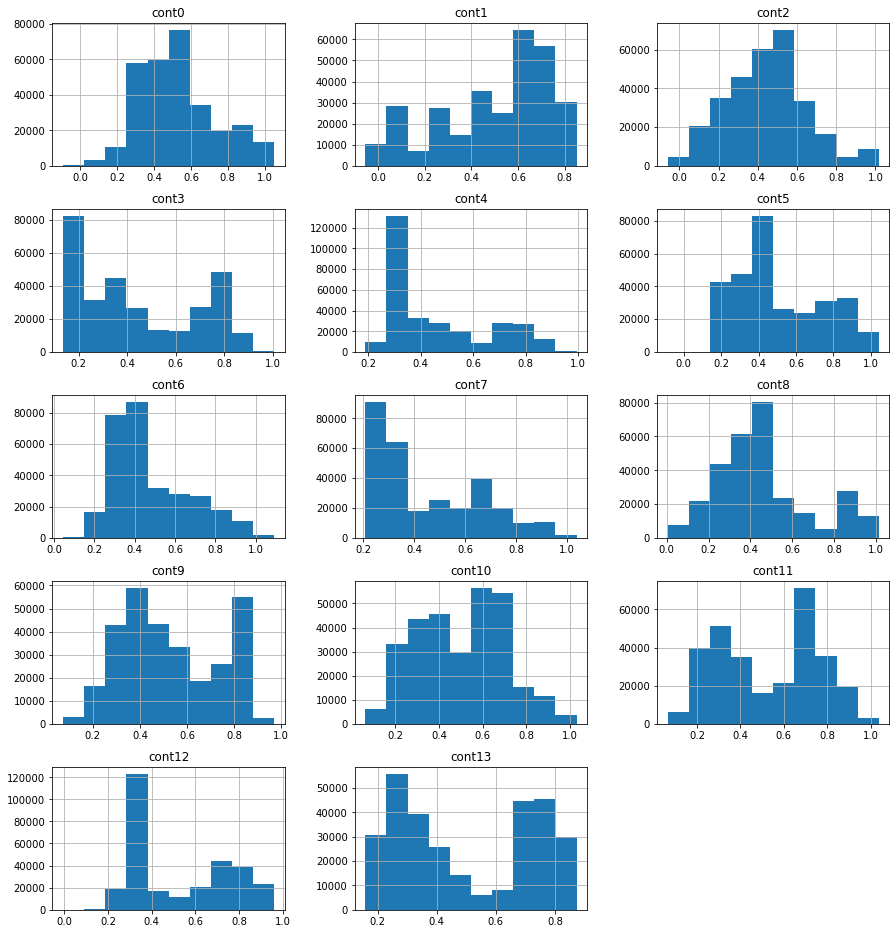

<IPython.core.display.Javascript object>

In [122]:
train_data_cleaned.hist(cont_cols, figsize=(15, 30), layout=(9, 3))

In [123]:
data_for_corr = pd.concat(
    [train_data_cleaned[cont_cols], train_data_cleaned["target"]], axis=1
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 864x720 with 0 Axes>

<IPython.core.display.Javascript object>

<AxesSubplot:>

<IPython.core.display.Javascript object>

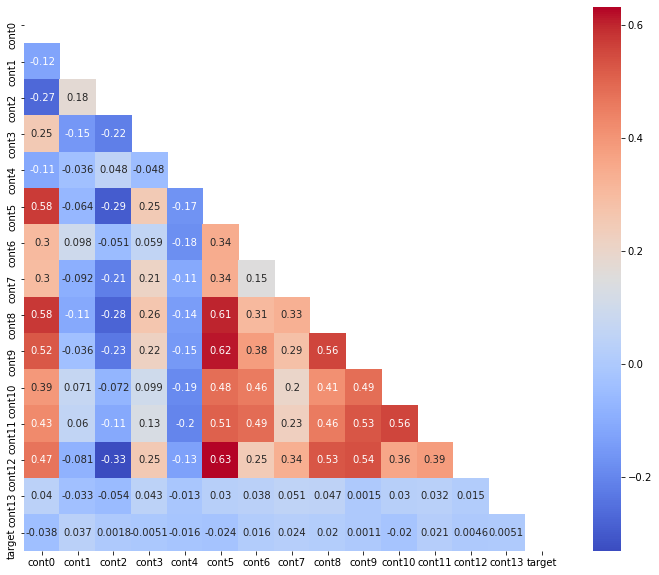

<IPython.core.display.Javascript object>

In [124]:
###https://www.kdnuggets.com/2019/07/annotated-heatmaps-correlation-matrix.html
corr_matrix = data_for_corr.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="coolwarm")
plt.show()

In [90]:
corr_matrix["target"].sort_values(ascending=False)[1:11]

cont1     0.037071
cont7     0.024184
cont11    0.021099
cont8     0.019530
cont6     0.015525
cont13    0.005116
cont12    0.004569
cont2     0.001815
cont9     0.001073
cont3    -0.005081
Name: target, dtype: float64

<IPython.core.display.Javascript object>

In [211]:
X_train_final = train_data_cleaned.drop("target", axis=1)
X_train_final.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,1,0,0,1,3,0,4,2,8,...,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903
1,1,0,0,0,1,1,0,4,0,5,...,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464
2,0,0,0,2,1,3,0,1,2,13,...,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352
3,0,0,0,2,1,3,0,4,6,10,...,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766
4,0,1,0,0,1,1,0,4,2,5,...,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743


<IPython.core.display.Javascript object>

In [212]:
y_train_cleaned = train_data_cleaned["target"]

<IPython.core.display.Javascript object>

In [127]:
###Now scale the data

#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#X_train_final = scaler.fit_transform(X_train_final)

<IPython.core.display.Javascript object>

In [213]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(
    X_train_final, y_train_cleaned, test_size=0.25, shuffle=True, random_state=42
)

print("X_train - ", X_train.shape)
print("y_train - ", y_train.shape)
print("X_validation - ", X_validation.shape)
print("y_validation - ", y_validation.shape)

X_train -  (224730, 24)
y_train -  (224730,)
X_validation -  (74911, 24)
y_validation -  (74911,)


<IPython.core.display.Javascript object>

In [306]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [352]:
from sklearn.metrics import mean_squared_error

y_predict = model.predict(X_validation)
y_train_predict = model.predict(X_train)


print(
    "Train accuracy RMSE: "
    + str(mean_squared_error(y_train, y_train_predict, squared=False))
)
print(
    "Test accuracy RMSE: "
    + str(mean_squared_error(y_validation, y_predict, squared=False))
)

Train accuracy RMSE: 0.8390304680819725
Test accuracy RMSE: 0.8407502541743306


<IPython.core.display.Javascript object>

In [355]:
# params_for_testing = {
#    "min_child_weight": [1, 5, 10],
#    "gamma": [0.5, 1, 1.5, 2, 5],
#    "subsample": [0.6, 0.8, 0.9],
#    "colsample_bytree": [0.6, 0.8],
#    "max_depth": [3, 4, 5],
#    "n_estimators": 1000,
#    "learning_rate": [0.01, 0.05, 0.07, 0.1, 0.3],
# }

<IPython.core.display.Javascript object>

In [356]:
# gsearch1 = GridSearchCV(
#    estimator=model, param_grid=parameters_for_testing, scoring="neg_mean_squared_error"
# )
# gsearch1.fit(X_train, y_train)
# print(gsearch1.grid_scores_)
# print("best params")
# print(gsearch1.best_params_)
# print("best score")
# print(gsearch1.best_score_)

<IPython.core.display.Javascript object>

In [357]:
model_tuned_final = xgb.XGBRegressor(
    max_depth=2,
    min_child_weight=4,
    n_estimators=1000,
    learning_rate=0.07,
    subsample=0.9,
    colsample_bytree=0.4,
    objective="reg:squarederror",
    eval_metric="rmse",
    random_state=42,
)

model_tuned_final.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.07, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.9, tree_method='exact',
             validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [358]:
y_predict = model_tuned_final.predict(X_validation)
y_train_predict = model_tuned_final.predict(X_train)
print("Train accuracy RMSE: " + str(mean_squared_error(y_train, y_train_predict, squared=False)))
print("Test accuracy RMSE: " + str(mean_squared_error(y_validation, y_predict,  squared=False)))

Train accuracy RMSE: 0.8369303443560022
Test accuracy RMSE: 0.8397934850675878


<IPython.core.display.Javascript object>